## Importing neccesary libraries

In [1]:
# Import neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

## Importing the data

In [2]:
# Import the data
df = pd.read_csv("creditcard.csv")

Explore the data e.g checking data types and non-null counts, get summary stasticcs, and display some of the data content

In [3]:
#Explore the Data
print(f'Data Info')
print(df.info())  # Check data types and non-null counts
print(f'\nSummary Statistics')
print(df.describe())  # Summary statistics
print(f'\nHead')
print(df.head())  # Display the first few rows of data

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  

## Preprocess and checking for missing value and duplicates and handling them

In [4]:
# Check for missing values
missing_values = df.isnull().sum().sum()
print(f"Total missing values: {missing_values}")

Total missing values: 0


In [5]:
# Check for duplicate records
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate records: {duplicate_count}")

Number of duplicate records: 1081


In [6]:
# Removing duplicates
df = df.drop_duplicates()

Some visualisation to check how our data look like and according to our context achievement to gain further insights into the dataset. the visualizations helps understand the distribution of features, especially in the context of the target variable ('Class' in this case) to identify any class imbalances or other patterns.

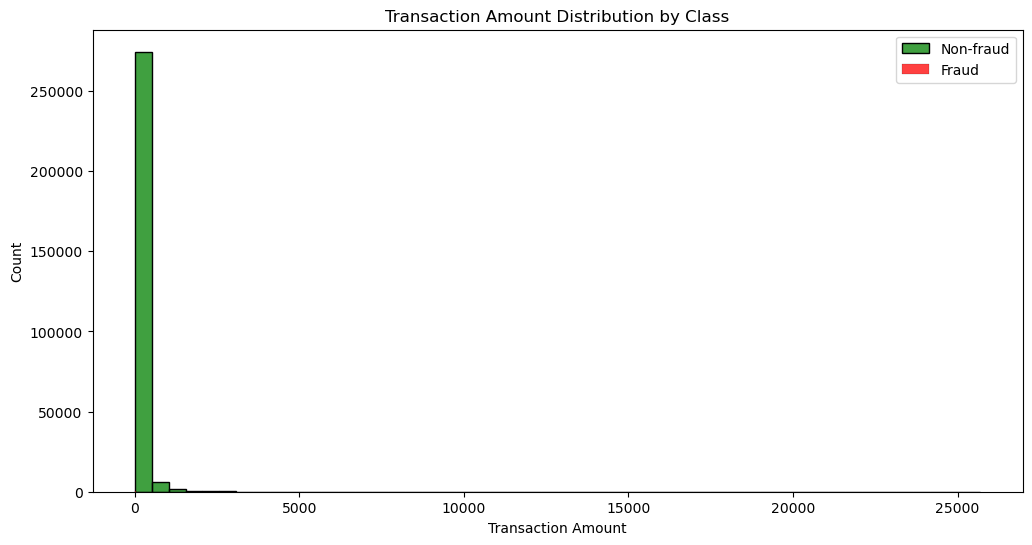

In [7]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['Class'] == 0]['Amount'], bins=50, color='g', label='Non-fraud')
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, color='r', label='Fraud')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.legend()
plt.title('Transaction Amount Distribution by Class')
plt.show()

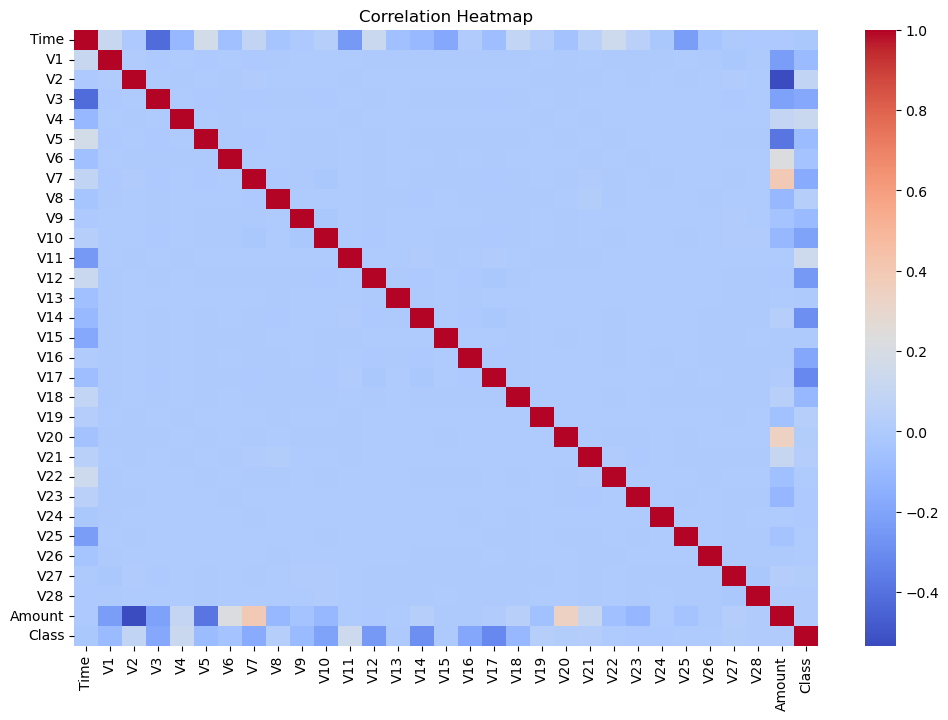

In [8]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

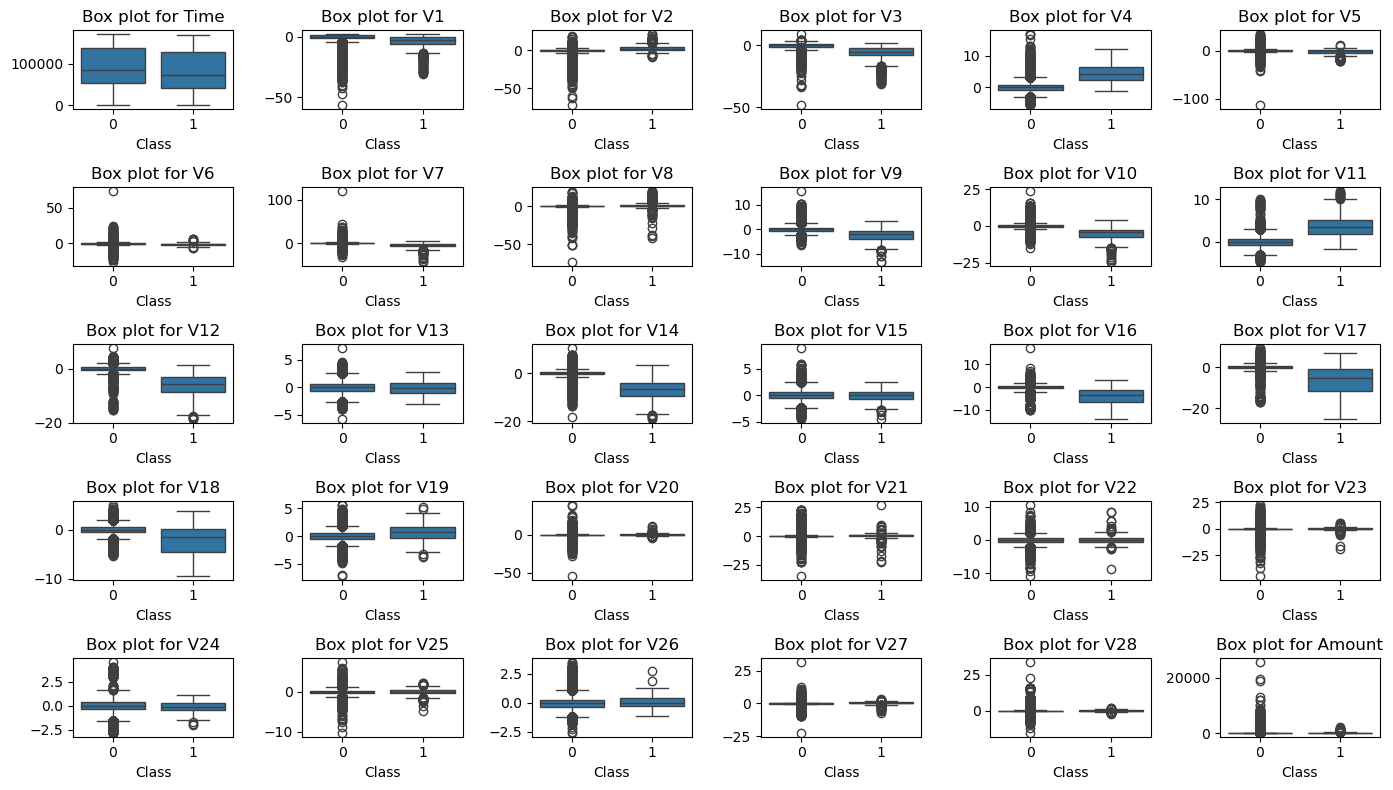

In [9]:
plt.figure(figsize=(14, 8))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(5, 6, i + 1)
    sns.boxplot(x='Class', y=col, data=df)
    plt.title(f'Box plot for {col}')
    plt.ylabel('')
plt.tight_layout()
plt.show()

## Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the 'Time' and 'Amount' columns
df['Time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

# Now 'Time' and 'Amount' are scaled
print(df.head())

       Time        V1        V2        V3        V4        V5        V6  \
0 -1.996823 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1 -1.996823  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2 -1.996802 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3 -1.996802 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4 -1.996781 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928   
1 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.237609  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575   
4  0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28    Amount  Class  
0  0.12

## Split Data into Training and Testing Sets

In [11]:
#spliting data
X = df.drop('Class', axis=1) # features (X)
y = df['Class'] # Target variable (y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X.head())
print(y.head())

       Time        V1        V2        V3        V4        V5        V6  \
0 -1.996823 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1 -1.996823  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2 -1.996802 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3 -1.996802 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4 -1.996781 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9  ...       V20       V21       V22       V23  \
0  0.239599  0.098698  0.363787  ...  0.251412 -0.018307  0.277838 -0.110474   
1 -0.078803  0.085102 -0.255425  ... -0.069083 -0.225775 -0.638672  0.101288   
2  0.791461  0.247676 -1.514654  ...  0.524980  0.247998  0.771679  0.909412   
3  0.237609  0.377436 -1.387024  ... -0.208038 -0.108300  0.005274 -0.190321   
4  0.592941 -0.270533  0.817739  ...  0.408542 -0.009431  0.798278 -0.137458   

        V24       V25       V26       V27       V28    Amount  
0  0

## Regression model building

In [12]:
# Create and train a Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [13]:
# Evaluate Logistic Regression
print("Logistic Regression Evaluation:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_lr)}")

Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.85      0.58      0.69        95

    accuracy                           1.00     56746
   macro avg       0.92      0.79      0.84     56746
weighted avg       1.00      1.00      1.00     56746

Confusion Matrix:
[[56641    10]
 [   40    55]]
ROC AUC: 0.7893854245151988


## Hyperparameter Tuning for Logistic Regression

In [14]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for Logistic Regression with 'l2' penalty
param_grid_lr = {
    'penalty': ['l2'],  # Use 'l2' penalty
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

# Create the Grid Search CV object
grid_search_lr = GridSearchCV(LogisticRegression(solver='lbfgs'), param_grid_lr, cv=5, scoring='f1')

# Fit the Grid Search to the training data
grid_search_lr.fit(X_train, y_train)

# Get the best hyperparameters
best_params_lr = grid_search_lr.best_params_

# Build a Logistic Regression model with the best hyperparameters
best_lr_model = LogisticRegression(solver='lbfgs', **best_params_lr)

# Train the best model on the training data
best_lr_model.fit(X_train, y_train)

LogisticRegression(C=1)

In [15]:
# Make predictions using the best logistic regression model
y_pred_lr_tuned = best_lr_model.predict(X_test)

In [16]:
# Print the classification report
print("Tuned Logistic Regression Evaluation:")
print(classification_report(y_test, y_pred_lr_tuned))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr_tuned))

# Print the ROC AUC score
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_lr_tuned)}")

Tuned Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.85      0.58      0.69        95

    accuracy                           1.00     56746
   macro avg       0.92      0.79      0.84     56746
weighted avg       1.00      1.00      1.00     56746

Confusion Matrix:
[[56641    10]
 [   40    55]]
ROC AUC: 0.7893854245151988


## Model building neural network

In [17]:
# Build a simple feedforward neural network
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.1, verbose=1)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

print("Neural Network Evaluation:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test, y_pred)
print(f"ROC AUC: {roc_auc_score(y_test, y_pred)}")

Epoch 1/20
3192/3192 [==============================] - 2s 414us/step - loss: 0.0159 - accuracy: 0.9985 - val_loss: 0.0030 - val_accuracy: 0.9995
Epoch 2/20
3192/3192 [==============================] - 1s 406us/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0027 - val_accuracy: 0.9996
Epoch 3/20
3192/3192 [==============================] - 1s 391us/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0028 - val_accuracy: 0.9996
Epoch 4/20
3192/3192 [==============================] - 1s 399us/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0026 - val_accuracy: 0.9996
Epoch 5/20
3192/3192 [==============================] - 1s 405us/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0029 - val_accuracy: 0.9994
Epoch 6/20
3192/3192 [==============================] - 1s 412us/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9995
Epoch 7/20
3192/3192 [==============================] - 1s 403us/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0029 -

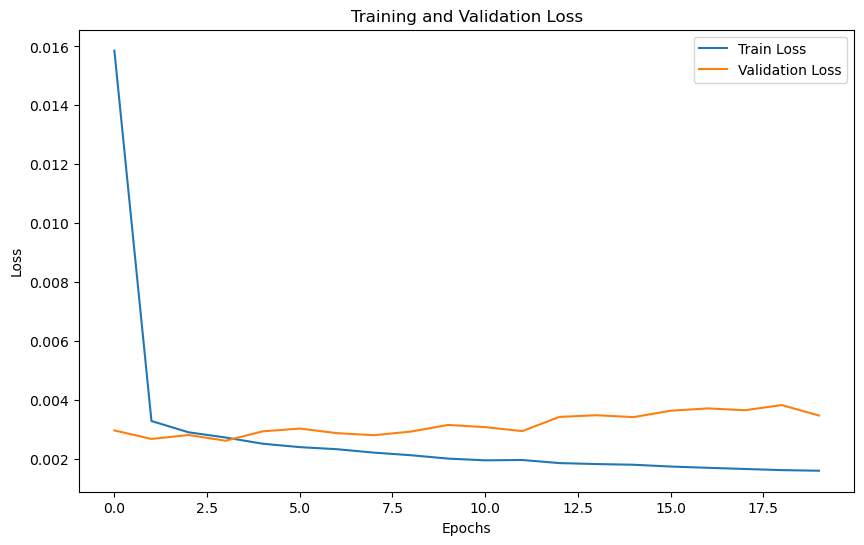

In [18]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Tuning neural network model

In [19]:
# a more complex neural network architecture
model = keras.Sequential([
    layers.Input(shape=(30,)),  # Input layer with 30 features
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 units and ReLU activation
    layers.Dense(64, activation='relu'),  # Additional hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(
    optimizer='adam',  # Use the Adam optimizer
    loss='binary_crossentropy',  # Binary cross-entropy loss for binary classification
    metrics=['accuracy']  # Monitor accuracy during training
)

# Train the model with more epochs and batch size
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,  # Increase the number of training epochs
    batch_size=64,  # Adjust the batch size
)

# Evaluate the model
eval_result = model.evaluate(X_test, y_test)
print("Fine-tuned Neural Network Evaluation:")
print(f"Accuracy: {eval_result[1]:.2f}")

# Precision, Recall, F1-score, and Confusion Matrix
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary predictions
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("\nClassification Report:")
print(report)

print("Confusion Matrix:")
print(conf_matrix)

# ROC AUC Score
y_pred_proba = model.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

Epoch 1/50
3547/3547 [==============================] - 2s 509us/step - loss: 0.0069 - accuracy: 0.9991 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 2/50
3547/3547 [==============================] - 2s 470us/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0039 - val_accuracy: 0.9994
Epoch 3/50
3547/3547 [==============================] - 2s 469us/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.0038 - val_accuracy: 0.9993
Epoch 4/50
3547/3547 [==============================] - 2s 473us/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0038 - val_accuracy: 0.9994
Epoch 5/50
3547/3547 [==============================] - 2s 485us/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0035 - val_accuracy: 0.9995
Epoch 6/50
3547/3547 [==============================] - 2s 504us/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0041 - val_accuracy: 0.9995
Epoch 7/50
3547/3547 [==============================] - 2s 477us/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.0044 -

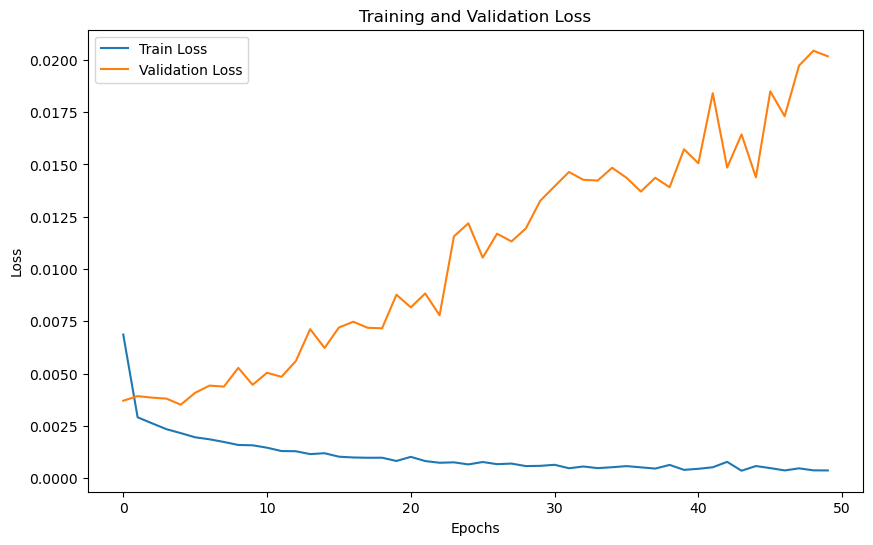

In [20]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()